In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
df_objects = pd.read_csv('data/objets-trouves-gares.csv', sep=';')

In [49]:
df_objects['Date'] = pd.to_datetime(df_objects.Date, utc=True)
df_objects['Date'] = pd.to_datetime(df_objects.Date).dt.tz_convert('Europe/Paris')
df_objects = df_objects[df_objects.Date.dt.year >= 2015]

In [52]:
df_grouped = (df_objects
    .groupby(by='Gare')
    .count()
    .Date
    .rename('Count')
    .sort_values(ascending=False)
    .iloc[:100])

df_cumsum = df_grouped.cumsum()

pareto = (df_cumsum < df_cumsum.max() * 0.8).sum()

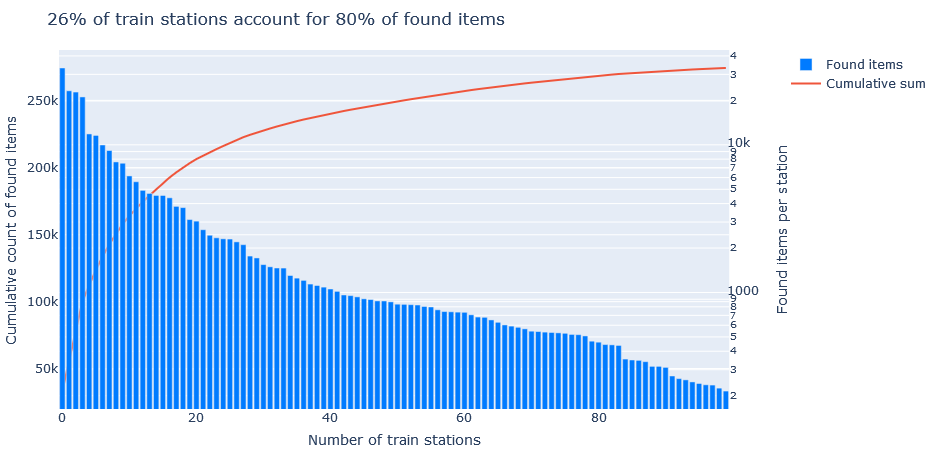

In [124]:
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=np.arange(len(df_grouped)), 
        y=df_grouped, 
        text=df_grouped.index,
        meta = df_grouped,
        hoverinfo="text+y",
        name="Found items",
        marker_color="#007bff"
    ),
    secondary_y=True,
)


fig.add_trace(go.Scatter(
    x=np.arange(len(df_cumsum)), 
    y=df_cumsum, 
    text=df_cumsum.index,
    meta = df_grouped,
    hoverinfo="y",
    name='Cumulative sum'
))


fig.update_layout(
    title=f'{pareto/len(df_cumsum) : 2.0%} of train stations account for 80% of found items',
    margin={'l': 30, 'r': 30, 't': 50, 'b': 0},

)

fig.update_xaxes(title_text="Number of train stations")
fig.update_yaxes(title_text="Cumulative count of found items", secondary_y=False)
fig.update_yaxes(title_text="Found items per station", secondary_y=True, type="log")
fig.show()

In [103]:
py.plot(fig, filename = 'sncf-found-items', auto_open=True)

'https://plotly.com/~hugolmn/14/'

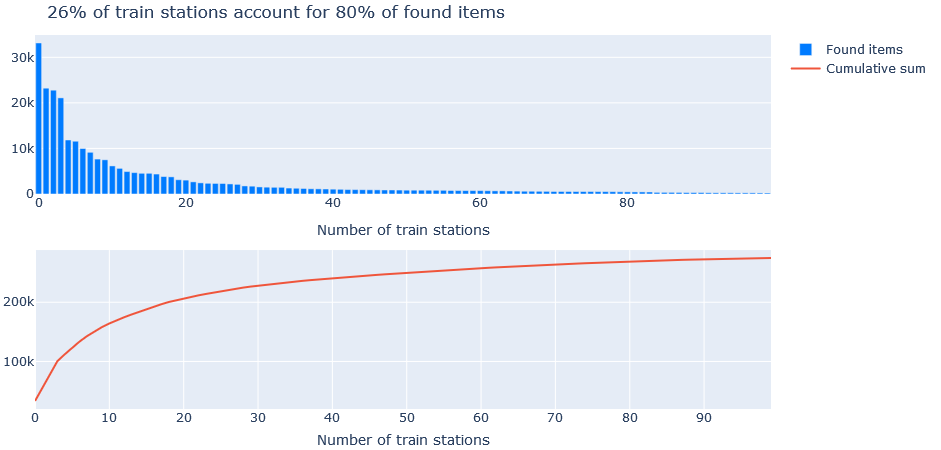

In [105]:
fig = go.Figure()
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Bar(
        x=np.arange(len(df_grouped)), 
        y=df_grouped, 
        text=df_grouped.index,
        meta = df_grouped,
        hoverinfo="text+y",
        name="Found items",
        marker_color="#007bff"
        ),
    row=1, 
    col=1
)


fig.add_trace(
    go.Scatter(
        x=np.arange(len(df_cumsum)), 
        y=df_cumsum, 
        text=df_cumsum.index,
        meta = df_grouped,
        hoverinfo="y",
        name='Cumulative sum'
    ),
    row=2, 
    col=1
    )


fig.update_layout(
    title=f'{pareto/len(df_cumsum) : 2.0%} of train stations account for 80% of found items',
    margin={'l': 0, 'r': 0, 't': 35, 'b': 0},

)
fig.update_xaxes(title_text="Number of train stations")
fig.update_yaxes(type="log", secondary_y=True)

fig.show()

In [227]:
df_months = df_objects.groupby(by=[df_objects.Date.dt.year, df_objects.Date.dt.month]).Date.count()
df_months.index = pd.to_datetime(dict(year=[i[0] for i in df_months.index], month=[i[1] for i in df_months.index], day=1))

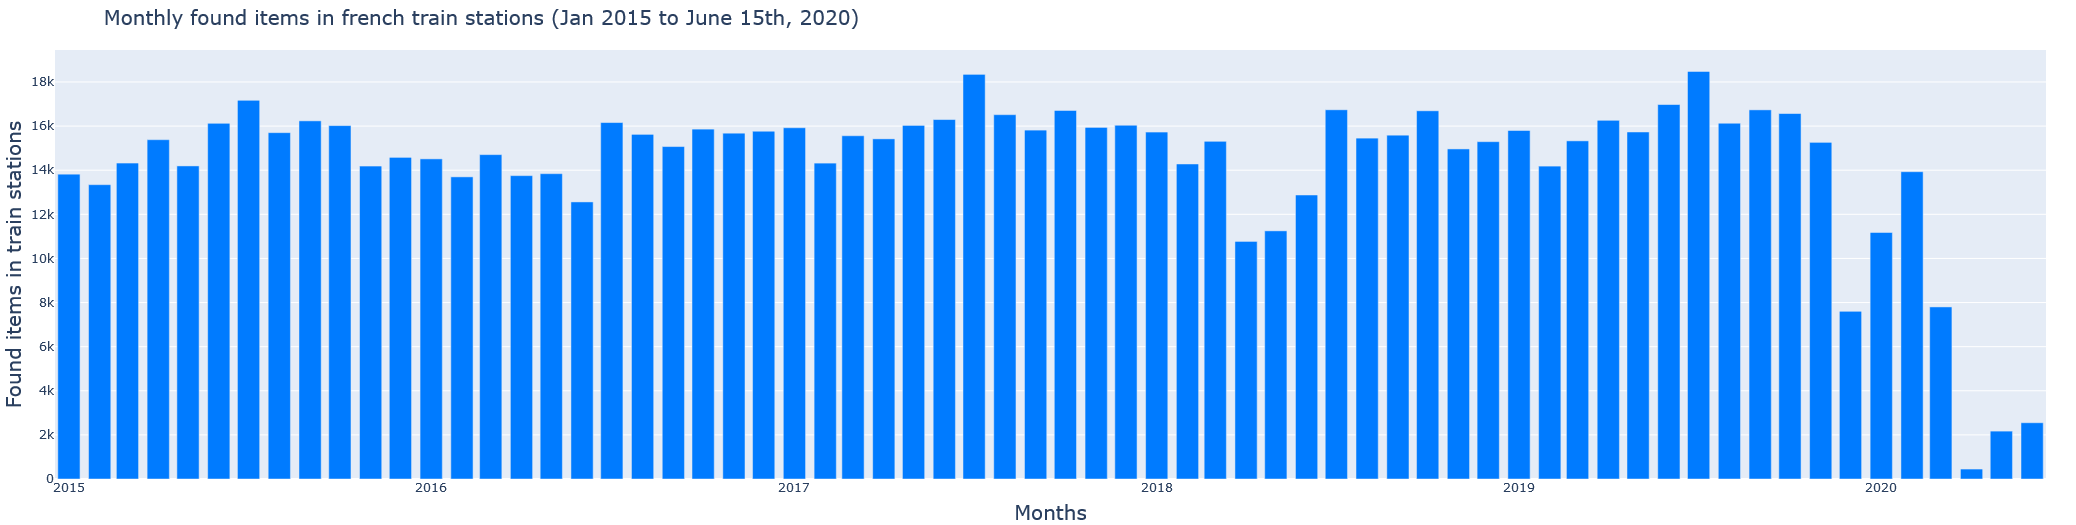

In [258]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_months.index,
    y=df_months, 
    text=df_months,
    meta = df_months,
    hoverinfo="x+y",
    marker_color="#007bff",  
))

fig.update_layout(
    width=800,
    height=525,
    title='Monthly found items in french train stations (Jan 2015 to June 15th, 2020)',
    titlefont=dict(size=20),
    xaxis=dict(title="Months", titlefont=dict(size=20)),
    yaxis=dict(title="Found items in train stations", titlefont=dict(size=20)),
    margin={'l': 30, 'r': 30, 't': 50, 'b': 0},
)

In [239]:
py.plot(fig, filename='sncf-monthly-found-items', auto_open=True)

'https://plotly.com/~hugolmn/21/'